<center>
<h1 style="color:red; font-size:70px;"> Esercitazione 2</h1>

In [56]:
import numpy as np
import matplotlib.pyplot as plt

from numba import njit
from numpy.random import default_rng

<center>
<h1 style="color:blue; font-size:50px;"> Esercizio 1</h1>

</center> 

In [13]:
# Allocazione matrice
a = np.array([[0.5, -1], [-1, 2]], dtype = np.float32)

# Studio caratteristiceh matrice
print(f"Dimensione dell'array: {a.shape}")
print(f"Rango del tensore: {a.ndim}")
print()

# Creazione della deep copy
b = a.copy().flatten()
print(f"Deep copy con flatten: {b}")

Dimensione dell'array: (2, 2)
Rango del tensore: 2

Deep copy con flatten: [ 0.5 -1.  -1.   2. ]


<center>
<h1 style="color:blue; font-size:50px;"> Esercizio 2</h1>

</center> 

In [39]:
def dot_prod(a, b):
    if a.ndim != 2 or b.ndim != 1:
        print("Errore nell'esecuzione del dot product! Funzionamento: matrice NxN, vettore N")
    
    elif len(a) != len(b):
            print("Errore, le dimensioni dei due vettori non sono compatibili nel dot product")
        
    else:
        res = np.zeros(len(a))

        for i in range(0, len(a)):
            for j in range(0, len(a)):
                res[i] += a[i, j] * b[j]
        
        return res


# Test metodo per calcolo dot product
a = np.array([[1, 2, 3], [4, 5, 6], [3, 2, 1]])
b = np.array([1, 2, 3])

print(f"Test funzione per calcolo del prodotto scalare: {dot_prod(a, b)}")

Test funzione per calcolo del prodotto scalare: [14. 32. 10.]


In [67]:
N = input("Dimensione da cui partire: ")

# Creazione di vettore casuale
a = np.array(default_rng(42).random((int(N),)), dtype = np.float64)
print(f"Vettore casuale: \n{a}")

# Creazione di matrice casuale
b = np.array(default_rng(41).random((int(N),int(N))), dtype = np.float64)
print()
print(f"Matrice casuale: \n{b}")

Vettore casuale: 
[0.77395605 0.43887844 0.85859792 0.69736803 0.09417735 0.97562235
 0.7611397  0.78606431 0.12811363 0.45038594 0.37079802 0.92676499
 0.64386512 0.82276161 0.4434142  0.22723872 0.55458479 0.06381726
 0.82763117 0.6316644  0.75808774 0.35452597 0.97069802 0.89312112
 0.7783835  0.19463871 0.466721   0.04380377 0.15428949 0.68304895
 0.74476216 0.96750973 0.32582536 0.37045971 0.46955581 0.18947136
 0.12992151 0.47570493 0.22690935 0.66981399 0.43715192 0.8326782
 0.7002651  0.31236664 0.8322598  0.80476436 0.38747838 0.2883281
 0.6824955  0.13975248 0.1999082  0.00736227 0.78692438 0.66485086
 0.70516538 0.78072903 0.45891578 0.5687412  0.139797   0.11453007
 0.66840296 0.47109621 0.56523611 0.76499886 0.63471832 0.5535794
 0.55920716 0.3039501  0.03081783 0.43671739 0.21458467 0.40852864
 0.85340307 0.23393949 0.05830274 0.28138389 0.29359376 0.66191651
 0.55703215 0.78389821 0.66431354 0.40638686 0.81402038 0.16697292
 0.02271207 0.09004786 0.72235935 0.46187723 0.

In [68]:
%%time
print(f"Funzione fatta da me:\n {dot_prod(b, a)}")

Funzione fatta da me:
 [256.71049215 246.30624011 250.04596545 248.59625668 245.42813607
 244.06646492 243.82462325 249.9051864  255.74980989 246.45882245
 246.82240757 249.89481459 259.14502501 247.47345816 240.76838178
 249.97576904 254.08417182 243.47307073 250.69577326 251.20009545
 248.36747981 260.39630974 246.51631311 249.75440244 252.00243786
 251.5988852  244.44358124 240.62594067 248.34732234 250.68043033
 245.19690395 246.04786635 247.91981409 257.75671656 245.013302
 242.39853459 242.44189547 252.18619956 238.45836275 246.90054353
 243.47106209 255.40022729 247.96593113 240.99232826 248.22038259
 250.44351941 253.10308692 255.37922343 252.97032059 239.84056397
 242.02844193 247.80584779 250.687699   247.18080826 251.04483113
 242.09550385 245.00348683 255.40539293 254.44464619 253.44645941
 257.60917597 247.91395766 240.71709904 242.76646094 244.10175749
 251.16007304 249.32683254 240.64894461 247.81686367 253.10990378
 248.48705562 255.60963835 251.40956064 250.37073459 24

In [69]:
%%time
print(f"Funzione di default numpy:\n {np.dot(b, a)}")

Funzione di default numpy:
 [256.71049215 246.30624011 250.04596545 248.59625668 245.42813607
 244.06646492 243.82462325 249.9051864  255.74980989 246.45882245
 246.82240757 249.89481459 259.14502501 247.47345816 240.76838178
 249.97576904 254.08417182 243.47307073 250.69577326 251.20009545
 248.36747981 260.39630974 246.51631311 249.75440244 252.00243786
 251.5988852  244.44358124 240.62594067 248.34732234 250.68043033
 245.19690395 246.04786635 247.91981409 257.75671656 245.013302
 242.39853459 242.44189547 252.18619956 238.45836275 246.90054353
 243.47106209 255.40022729 247.96593113 240.99232826 248.22038259
 250.44351941 253.10308692 255.37922343 252.97032059 239.84056397
 242.02844193 247.80584779 250.687699   247.18080826 251.04483113
 242.09550385 245.00348683 255.40539293 254.44464619 253.44645941
 257.60917597 247.91395766 240.71709904 242.76646094 244.10175749
 251.16007304 249.32683254 240.64894461 247.81686367 253.10990378
 248.48705562 255.60963835 251.40956064 250.370734

In [70]:
@njit
def dop_prod(a, b):
    if a.ndim != 2 or b.ndim != 1:
        print("Errore nell'esecuzione del dot product! Funzionamento: matrice NxN, vettore N")
    
    elif len(a) != len(b):
            print("Errore, le dimensioni dei due vettori non sono compatibili nel dot product")
        
    else:
        res = np.zeros(len(a))

        for i in range(0, len(a)):
            for j in range(0, len(a)):
                res[i] += a[i, j] * b[j]
        
        return res

In [71]:
%%time
print(f"Funzione fatta da me dopo miglioramento performance:\n {dop_prod(b, a)}")

Funzione fatta da me dopo miglioramento performance:
 [256.71049215 246.30624011 250.04596545 248.59625668 245.42813607
 244.06646492 243.82462325 249.9051864  255.74980989 246.45882245
 246.82240757 249.89481459 259.14502501 247.47345816 240.76838178
 249.97576904 254.08417182 243.47307073 250.69577326 251.20009545
 248.36747981 260.39630974 246.51631311 249.75440244 252.00243786
 251.5988852  244.44358124 240.62594067 248.34732234 250.68043033
 245.19690395 246.04786635 247.91981409 257.75671656 245.013302
 242.39853459 242.44189547 252.18619956 238.45836275 246.90054353
 243.47106209 255.40022729 247.96593113 240.99232826 248.22038259
 250.44351941 253.10308692 255.37922343 252.97032059 239.84056397
 242.02844193 247.80584779 250.687699   247.18080826 251.04483113
 242.09550385 245.00348683 255.40539293 254.44464619 253.44645941
 257.60917597 247.91395766 240.71709904 242.76646094 244.10175749
 251.16007304 249.32683254 240.64894461 247.81686367 253.10990378
 248.48705562 255.609638

<center>
<h1 style="color:blue; font-size:50px;"> Esercizio 3</h1>

</center> 

In [75]:
# Funzione per esercizio 3
def func_1(x):
    return np.exp(-x) * np.cos(2*np.pi*x) 

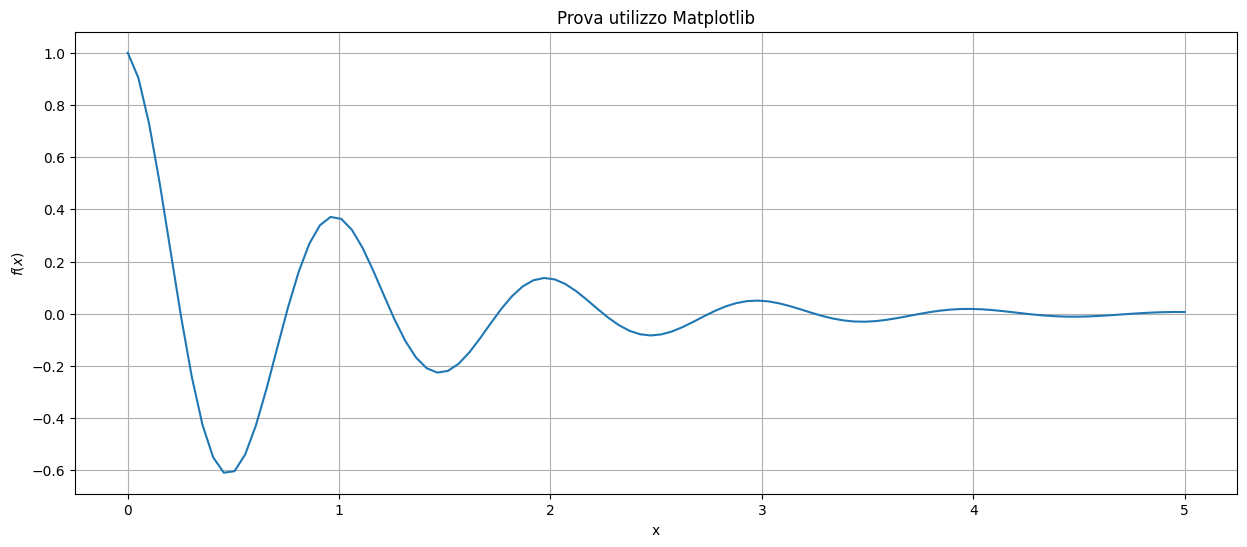

In [77]:
x = np.linspace(0, 5, 100)
y = func_1(x)

fig = plt.figure(figsize=(15, 6))

plt.plot(x, y)
plt.title("Prova utilizzo Matplotlib")
plt.ylabel(r"$f\left(x\right)$")
plt.xlabel("x")
plt.grid(True)

plt.show()

<center>
<h1 style="color:blue; font-size:50px;"> Esercizio 4</h1>

</center> 

<center>
<h1 style="color:blue; font-size:50px;"> Esercizio 5</h1>

</center> 

<center>
<h1 style="color:blue; font-size:50px;"> Esercizio 6</h1>

</center> 